In [1]:
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gensim
from gensim.models import Word2Vec

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from src.dataset import read_dataset, tokenize_dataset, get_vocab_mapping

sns.set_theme()
sns.set(rc={'figure.figsize': (12, 8)})

In [2]:
# replace path with local dataset path
dataset_path = "snippets-dev/snippets-dev.db"

In [3]:
def train_test_tokenized_dataset(db_file_path, programming_language=None):
    df = read_dataset(db_file_path, programming_language)
    df = tokenize_dataset(df)
    return train_test_split(df, test_size=0.2)

In [4]:
python_train, python_test = train_test_tokenized_dataset(dataset_path, "Python")

In [5]:
model = Word2Vec(sentences=python_train["code"],
    vector_size=32, window=10, min_count=5, workers=12, sg=1)

In [6]:
np.random.seed(42)
python_train["code"].sample(5)

134713    [#, update, redis, configs, config_dict, ., up...
190454    [self, ., global_step, =, autoincreased_step_c...
87649     [#, of, the, public, at, large, and, to, the, ...
152501    [except, exception, \n, edl, ., append, (, dl,...
143174    [STRING_LITERAL, ,, STRING_LITERAL, ,, STRING_...
Name: code, dtype: object

In [7]:
test_words = []
np.random.seed(42)
for code in python_train["code"].sample(5):
    test_words.extend(code)
test_words[:5]

['#', 'update', 'redis', 'configs', 'config_dict']

In [8]:
def word_cloud(words):
    words = list(set(words))
    words = [word for word in words if word in model.wv]
    vecs = [model.wv[word] for word in words]
    vecs = np.asarray(vecs)
    # visulize 2D with dimensionality reductino
    pca = PCA(2)
    vecs = pca.fit_transform(vecs)
    ax = sns.scatterplot(x=vecs[:,0], y=vecs[:,1])
    for i, word in enumerate(words):
        ax.text(vecs[i,0] + 0.01, vecs[i,1], word,
            verticalalignment='center')
    return ax

<AxesSubplot: >

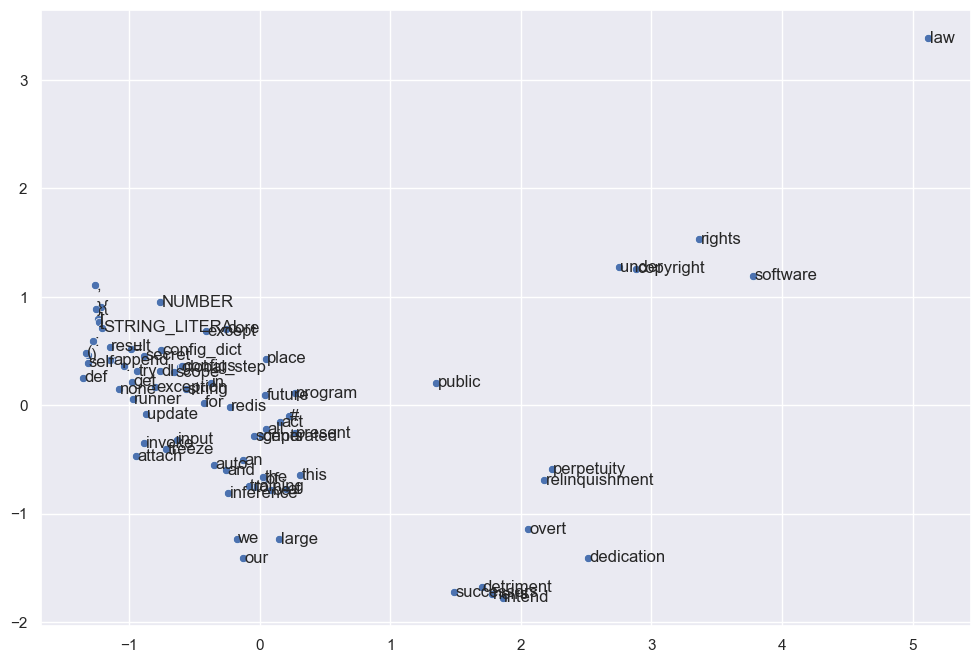

In [9]:
word_cloud(test_words)

<AxesSubplot: >

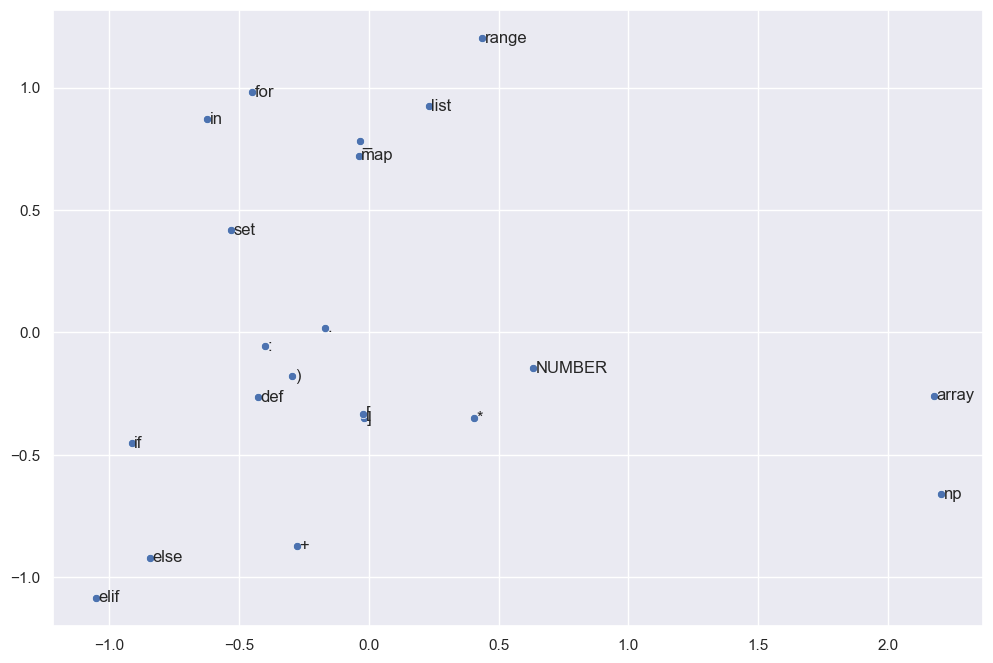

In [10]:
word_cloud(["range", "np", "array", "list", "map", "set", "for", "def", "if", "elif", "else", "in", "NUMBER", "+", "*", "_", ":", "class"
    "(", ")", "[", "]", "."])

In [12]:
model.predict_output_word(["assert"])

[('assert', 0.0049601407),
 ('ha_state', 0.004819044),
 ('mock_calls', 0.003917408),
 ('result_type_form', 0.003788703),
 ('data_entry_flow', 0.003553572),
 ('result_type_create_entry', 0.0023008005),
 ('state_on', 0.0022623464),
 ('call_count', 0.0021626842),
 ('result_type_abort', 0.0021178203),
 ('hmip_device', 0.0018658858)]